<a href="https://colab.research.google.com/github/nadjaguerra/SoulCode_Academy/blob/main/ETLvendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
Nadja Guerra
****

## Estudo de Caso

###Análise de Vendas
Base de dados de Vendas, do ano de 2020, de uma empresa
que vende equipamentos eletrônicos para alguns grandes clientes corporativos.

## **Instalação e Importação de libs**


In [ ]:
!pip install pymongo
!python -m pip install "pymongo[srv]"
!pip install pandera

In [ ]:
import pymongo
import pandas as pd
import pandera as pa
import plotly.express as px
from pymongo import MongoClient
from pymongo.server_api import ServerApi

## **Conexão MongoDB**


In [ ]:
# Passo 1: Comando de abertura para google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

uri = "mongodb+srv://etlad5.rdopmdr.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority&appName=ETLad5"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/BootCamp Análise de Dados/ETL/ETLAD5/chaves/X509-cert-3003797152669247061.pem',
                     server_api=ServerApi('1'))


In [ ]:
db = client['ETLAD5']
collection = db['vendas']
doc_count = collection.count_documents({})
print(doc_count)

0


## **Extração**


In [ ]:
# Passo 8: Abertura da base de dados
df = pd.read_csv('/content/drive/MyDrive/BootCamp Análise de Dados/ETL/ETLAD5/vendas.csv')

In [ ]:
df

,Unnamed: 0,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente
0,NaN,10001,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,R$37.800,amazon,Rio de Janeiro,RJ
1,NaN,10002,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,R$102.600,Shoptime,Betim,MINAS
2,NaN,10003,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,R$253.700,Carrefour,Rio de Janeiro,RJ
3,NaN,10004,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,R$382.700,Carrefour,Rio de Janeiro,RJ
4,NaN,10005,1/2/2020,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,R$6.248,Ricardo Eletro,Vitória,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,NaN,200807,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,R$21.978,amazon,Salvador,BA
3207,NaN,200808,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,R$1.600,Ponto Frio,Salvador,BA
3208,NaN,200809,12/29/2020,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,R$127.800,kabum,Fortaleza,CE
3209,NaN,200810,12/30/2020,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,R$12.750,Casas Bahia,João Pessoa,PB


In [ ]:
# Conversão para colocar os dados no MongoDB
df_dict = df.to_dict("records")
collection.insert_many(df_dict)

In [ ]:
#  Checagem de valores no MongoDB
collection.count_documents({})

3211

## **Pré-Análise**

In [ ]:
df

,Unnamed: 0,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente
0,NaN,10001,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,R$37.800,amazon,Rio de Janeiro,RJ
1,NaN,10002,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,R$102.600,Shoptime,Betim,MINAS
2,NaN,10003,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,R$253.700,Carrefour,Rio de Janeiro,RJ
3,NaN,10004,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,R$382.700,Carrefour,Rio de Janeiro,RJ
4,NaN,10005,1/2/2020,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,R$6.248,Ricardo Eletro,Vitória,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,NaN,200807,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,R$21.978,amazon,Salvador,BA
3207,NaN,200808,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,R$1.600,Ponto Frio,Salvador,BA
3208,NaN,200809,12/29/2020,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,R$127.800,kabum,Fortaleza,CE
3209,NaN,200810,12/30/2020,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,R$12.750,Casas Bahia,João Pessoa,PB


In [ ]:
 #verificar o tamenho do dataframe (linhas, colunas)
df.shape

(3211, 14)

In [ ]:
# verificando o tipo de dados de cada coluna
df.dtypes

In [ ]:
 # contar quantas observações nós temos em cada coluna
df.count()

Unnamed: 0               0
ID_Pedido             3211
Data_Pedido           3211
ID_Representante      3211
Nome_Representante    3211
Regional              3211
ID_Produto            3211
Nome_Produto          3211
Valor_Produto         3211
Quantidade_Vendida    3211
Valor_Total_Venda     3211
Nome_Cliente          3211
Cidade_Cliente        3211
Estado_Cliente        3211
dtype: int64

In [ ]:
# informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          0 non-null      float64
 1   ID_Pedido           3211 non-null   int64  
 2   Data_Pedido         3211 non-null   object 
 3   ID_Representante    3211 non-null   int64  
 4   Nome_Representante  3211 non-null   object 
 5   Regional            3211 non-null   object 
 6   ID_Produto          3211 non-null   object 
 7   Nome_Produto        3211 non-null   object 
 8   Valor_Produto       3211 non-null   object 
 9   Quantidade_Vendida  3211 non-null   int64  
 10  Valor_Total_Venda   3211 non-null   object 
 11  Nome_Cliente        3211 non-null   object 
 12  Cidade_Cliente      3211 non-null   object 
 13  Estado_Cliente      3211 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 351.3+ KB


## **Transformação**

In [ ]:
df

,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente,Mês
0,10001,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,37800,amazon,Rio de Janeiro,RJ,2020-01
1,10002,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,102600,Shoptime,Betim,MINAS,2020-01
2,10003,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,253700,Carrefour,Rio de Janeiro,RJ,2020-01
3,10004,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,382700,Carrefour,Rio de Janeiro,RJ,2020-01
4,10005,2020-01-02,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,6248,Ricardo Eletro,Vitória,ES,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,200807,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,21978,amazon,Salvador,BA,2020-12
3207,200808,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,1600,Ponto Frio,Salvador,BA,2020-12
3208,200809,2020-12-29,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,127800,kabum,Fortaleza,CE,2020-12
3209,200810,2020-12-30,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,12750,Casas Bahia,João Pessoa,PB,2020-12


In [ ]:
#Alterando o nome da coluna Mês
df.rename(columns={'Mês': 'mes'}, inplace=True)


In [ ]:
df

,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente,mes
0,10001,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,37800,amazon,Rio de Janeiro,RJ,2020-01
1,10002,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,102600,Shoptime,Betim,MINAS,2020-01
2,10003,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,253700,Carrefour,Rio de Janeiro,RJ,2020-01
3,10004,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,382700,Carrefour,Rio de Janeiro,RJ,2020-01
4,10005,2020-01-02,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,6248,Ricardo Eletro,Vitória,ES,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,200807,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,21978,amazon,Salvador,BA,2020-12
3207,200808,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,1600,Ponto Frio,Salvador,BA,2020-12
3208,200809,2020-12-29,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,127800,kabum,Fortaleza,CE,2020-12
3209,200810,2020-12-30,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,12750,Casas Bahia,João Pessoa,PB,2020-12


### **Valores nulos**

In [ ]:
# verificando valores nulos
df.isnull().sum()

Unnamed: 0            3211
ID_Pedido                0
Data_Pedido              0
ID_Representante         0
Nome_Representante       0
Regional                 0
ID_Produto               0
Nome_Produto             0
Valor_Produto            0
Quantidade_Vendida       0
Valor_Total_Venda        0
Nome_Cliente             0
Cidade_Cliente           0
Estado_Cliente           0
dtype: int64

In [ ]:
# verificando valores nulos
df.isna().sum()

Unnamed: 0            3211
ID_Pedido                0
Data_Pedido              0
ID_Representante         0
Nome_Representante       0
Regional                 0
ID_Produto               0
Nome_Produto             0
Valor_Produto            0
Quantidade_Vendida       0
Valor_Total_Venda        0
Nome_Cliente             0
Cidade_Cliente           0
Estado_Cliente           0
dtype: int64

### **Eliminando Coluna Nula**

In [ ]:
# Remover a coluna "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente
0,10001,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,R$37.800,amazon,Rio de Janeiro,RJ
1,10002,1/1/2020,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,R$102.600,Shoptime,Betim,MINAS
2,10003,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,R$253.700,Carrefour,Rio de Janeiro,RJ
3,10004,1/2/2020,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,R$382.700,Carrefour,Rio de Janeiro,RJ
4,10005,1/2/2020,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,R$6.248,Ricardo Eletro,Vitória,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,200807,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,R$21.978,amazon,Salvador,BA
3207,200808,12/28/2020,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,R$1.600,Ponto Frio,Salvador,BA
3208,200809,12/29/2020,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,R$127.800,kabum,Fortaleza,CE
3209,200810,12/30/2020,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,R$12.750,Casas Bahia,João Pessoa,PB


### **Conversões**

In [ ]:
# Verificação dos tipos de dados
df.dtypes

ID_Pedido              int64
Data_Pedido           object
ID_Representante       int64
Nome_Representante    object
Regional              object
ID_Produto            object
Nome_Produto          object
Valor_Produto         object
Quantidade_Vendida     int64
Valor_Total_Venda     object
Nome_Cliente          object
Cidade_Cliente        object
Estado_Cliente        object
dtype: object

In [ ]:
# Converter
df['ID_Pedido'] = df['ID_Pedido'].astype(str)
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'])

In [ ]:
# Extrair o mês de `Data_Pedido` para uma nova coluna `Mês`
df['Mes'] = df['Data_Pedido'].dt.to_period('M')

In [ ]:

df = df.drop(df.columns[-2:], axis=1)

In [ ]:
df.dtypes

ID_Pedido                     object
Data_Pedido           datetime64[ns]
ID_Representante               int64
Nome_Representante            object
Regional                      object
ID_Produto                    object
Nome_Produto                  object
Valor_Produto                 object
Quantidade_Vendida             int64
Valor_Total_Venda              int64
Nome_Cliente                  object
Cidade_Cliente                object
Estado_Cliente                object
mes                        period[M]
dtype: object

In [ ]:
# Corrigindo dados da colina Estado_Cliente
# Substituir 'MINAS' por 'MG'
df['Estado_Cliente'] = df['Estado_Cliente'].replace('MINAS', 'MG')

In [ ]:
# Verificar o resultado
print(df['Estado_Cliente'])

0       RJ
1       MG
2       RJ
3       RJ
4       ES
        ..
3206    BA
3207    BA
3208    CE
3209    PB
3210    RN
Name: Estado_Cliente, Length: 3211, dtype: object


### **Adicionando Colunas**

In [ ]:
# Dicionário com o mapeamento das regiões para suas respectivas coordenadas geográficas
mapeamento_regioes = {
    'Norte': {'Latitude': -3.7437, 'Longitude': -52.6974},
    'Nordeste': {'Latitude': -8.0476, 'Longitude': -34.8770},
    'Centro-Oeste': {'Latitude': -15.827, 'Longitude': -47.9218},
    'Sudeste': {'Latitude': -23.5505, 'Longitude': -46.6333},
    'Sul': {'Latitude': -30.0323, 'Longitude': -51.2293}
}

# Adicionar colunas de latitude e longitude ao DataFrame com base no mapeamento das regiões
df['Latitude'] = df['Regional'].map(lambda regiao: mapeamento_regioes[regiao]['Latitude'])
df['Longitude'] = df['Regional'].map(lambda regiao: mapeamento_regioes[regiao]['Longitude'])


### **Validação SCHEMA**

In [ ]:
schema = pa.DataFrameSchema({
    "ID_Pedido": pa.Column(pa.String),
    "Data_Pedido": pa.Column(pa.DateTime),
    "ID_Representante": pa.Column(pa.Int64),
    "Nome_Representante": pa.Column(pa.String),
    "Regional": pa.Column(pa.String),
    "ID_Produto": pa.Column(pa.String),
    "Nome_Produto": pa.Column(pa.String),
    "Valor_Produto": pa.Column(pa.String),
    "Quantidade_Vendida": pa.Column(pa.Int64),
    "Valor_Total_Venda": pa.Column(pa.Int64),
    "Nome_Cliente": pa.Column(pa.String),
    "Cidade_Cliente": pa.Column(pa.String),
    "Estado_Cliente": pa.Column(pa.String),
})

In [ ]:
# Validar o DataFrame
schema.validate(df)

,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente,mes,Primeira_Palavra,Produto,Latitude,Longitude
0,10001,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,37800,amazon,Rio de Janeiro,RJ,2020-01,Celular,Celular,-23.5505,-46.6333
1,10002,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,102600,Shoptime,Betim,MG,2020-01,Celular,Celular,-23.5505,-46.6333
2,10003,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,253700,Carrefour,Rio de Janeiro,RJ,2020-01,Notebook,Notebook,-23.5505,-46.6333
3,10004,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,382700,Carrefour,Rio de Janeiro,RJ,2020-01,Notebook,Notebook,-23.5505,-46.6333
4,10005,2020-01-02,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,6248,Ricardo Eletro,Vitória,ES,2020-01,Mouse,Mouse,-23.5505,-46.6333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,200807,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,21978,amazon,Salvador,BA,2020-12,Smart,Smart,-8.0476,-34.8770
3207,200808,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,1600,Ponto Frio,Salvador,BA,2020-12,Teclado,Teclado,-8.0476,-34.8770
3208,200809,2020-12-29,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,127800,kabum,Fortaleza,CE,2020-12,Celular,Celular,-8.0476,-34.8770
3209,200810,2020-12-30,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,12750,Casas Bahia,João Pessoa,PB,2020-12,E-Reader,E-Reader,-8.0476,-34.8770


# **Carregamento**
### Enviando Dados Tratados para o MongoDB

In [ ]:
#  Montagem de pasta para carregamento no MongoDB dos dados tratados
db2 = client['ETLAD5']
collection2 = db2['vendastratado']
collection2.count_documents({})

3211

In [ ]:
#Conversão de dados para MongoDB e carregamento na pasta correspondente
df['mes'] = df['mes'].astype(str)

df_dict = df.to_dict("records")
collection2.insert_many(df_dict)

InsertManyResult([ObjectId('6645109379ff176113bc3795'), ObjectId('6645109379ff176113bc3796'), ObjectId('6645109379ff176113bc3797'), ObjectId('6645109379ff176113bc3798'), ObjectId('6645109379ff176113bc3799'), ObjectId('6645109379ff176113bc379a'), ObjectId('6645109379ff176113bc379b'), ObjectId('6645109379ff176113bc379c'), ObjectId('6645109379ff176113bc379d'), ObjectId('6645109379ff176113bc379e'), ObjectId('6645109379ff176113bc379f'), ObjectId('6645109379ff176113bc37a0'), ObjectId('6645109379ff176113bc37a1'), ObjectId('6645109379ff176113bc37a2'), ObjectId('6645109379ff176113bc37a3'), ObjectId('6645109379ff176113bc37a4'), ObjectId('6645109379ff176113bc37a5'), ObjectId('6645109379ff176113bc37a6'), ObjectId('6645109379ff176113bc37a7'), ObjectId('6645109379ff176113bc37a8'), ObjectId('6645109379ff176113bc37a9'), ObjectId('6645109379ff176113bc37aa'), ObjectId('6645109379ff176113bc37ab'), ObjectId('6645109379ff176113bc37ac'), ObjectId('6645109379ff176113bc37ad'), ObjectId('6645109379ff176113bc37

In [ ]:
#Checagem da coleção
df_dict = df.to_dict("records")
df

,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente,mes,Primeira_Palavra,Produto,Latitude,Longitude
0,10001,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,21,37800,amazon,Rio de Janeiro,RJ,2020-01,Celular,Celular,-23.5505,-46.6333
1,10002,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,R$1.800,57,102600,Shoptime,Betim,MG,2020-01,Celular,Celular,-23.5505,-46.6333
2,10003,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,59,253700,Carrefour,Rio de Janeiro,RJ,2020-01,Notebook,Notebook,-23.5505,-46.6333
3,10004,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,R$4.300,89,382700,Carrefour,Rio de Janeiro,RJ,2020-01,Notebook,Notebook,-23.5505,-46.6333
4,10005,2020-01-02,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,R$88,71,6248,Ricardo Eletro,Vitória,ES,2020-01,Mouse,Mouse,-23.5505,-46.6333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,200807,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,R$1.998,11,21978,amazon,Salvador,BA,2020-12,Smart,Smart,-8.0476,-34.8770
3207,200808,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,R$80,20,1600,Ponto Frio,Salvador,BA,2020-12,Teclado,Teclado,-8.0476,-34.8770
3208,200809,2020-12-29,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,R$1.800,71,127800,kabum,Fortaleza,CE,2020-12,Celular,Celular,-8.0476,-34.8770
3209,200810,2020-12-30,1001,Maria Silva,Nordeste,SKU9006,E-Reader,R$250,51,12750,Casas Bahia,João Pessoa,PB,2020-12,E-Reader,E-Reader,-8.0476,-34.8770


# **Análise De Dados**

1 - Quais são os produtos mais vendidos?

2 - Quais representantes de vendas têm o melhor desempenho?

3 - Como os valores totais de venda variam ao longo do tempo?

4 - Qual é a relação entre a quantidade vendida e o valor total de venda?


## **1 - Quais são os produtos mais vendidos?**

In [ ]:
#PRODUTOS IGUAIS MODELOS DIFERENTES
def formatar_quantidade(quantidade):
    if quantidade >= 1000:
        return f"{quantidade/1000:.0f}k Unidades"
    else:
        return f"{quantidade} Unidades"
df['Produto'] = df['Nome_Produto'].str.split().str[0]
produtos_agrupados = df.groupby('Produto')['Quantidade_Vendida'].sum()
produtos_agrupados_formatados = produtos_agrupados.apply(formatar_quantidade)

produtos_agrupados_formatados.head(5)


Produto
Caixa          6k Unidades
Carregador    13k Unidades
Celular       37k Unidades
E-Reader      10k Unidades
Headphone      9k Unidades
Name: Quantidade_Vendida, dtype: object

In [ ]:
produtos_agrupados_top5 = produtos_agrupados.head(5)
df_top5 = produtos_agrupados_top5.reset_index(name='Quantidade_Vendida')
#definindo cores
fig = px.pie(df_top5, values='Quantidade_Vendida', names='Produto',
             color_discrete_sequence=px.colors.sequential.Cividis_r)
fig.update_layout(title='Produtos Mais Vendidos em 2020',
                  title_x=0.5,
                  showlegend=True)

fig.show()


## **2 - Quais representantes de vendas têm o melhor desempenho?**

In [ ]:
desempenho_representantes = df.groupby('Nome_Representante')['Valor_Total_Venda'].sum().reset_index(name='Total_Vendas')
desempenho_representantes = desempenho_representantes.sort_values(by='Total_Vendas', ascending=False)
fig = px.bar(desempenho_representantes, x='Nome_Representante', y='Total_Vendas',
             color='Total_Vendas', color_continuous_scale=px.colors.sequential.Cividis)

fig.update_layout(title='Desempenho dos Representantes de Vendas',
                  xaxis_title='Representante de Vendas',
                  yaxis_title='Total de Vendas',
                  title_x=0.5)
fig.show()


## **3 - Como os valores totais de venda variam ao longo do tempo?**

In [ ]:
vendas_por_mes = df.groupby('mes')['Valor_Total_Venda'].sum()

trace = go.Scatter(
    x = vendas_por_mes.index,
    y = vendas_por_mes.values,
    mode = 'lines+markers',
    marker = dict(size=8, color='rgba(210, 180, 140, 9)'),
    line=dict(color='rgba(139, 69, 19, 1.0)', width=4),
    name = 'Valor Total de Vendas'
)

data = [trace]
layout = go.Layout(
    title = '<b>Variação dos Valores Totais de Venda ao Longo do Tempo</b>',
    titlefont = {'family': 'Arial', 'size': 24},
    xaxis = {'title': 'Mês'},
    yaxis = {'title': 'Valor Total de Vendas'},
)
fig = go.Figure(data=data, layout=layout)
fig.show()


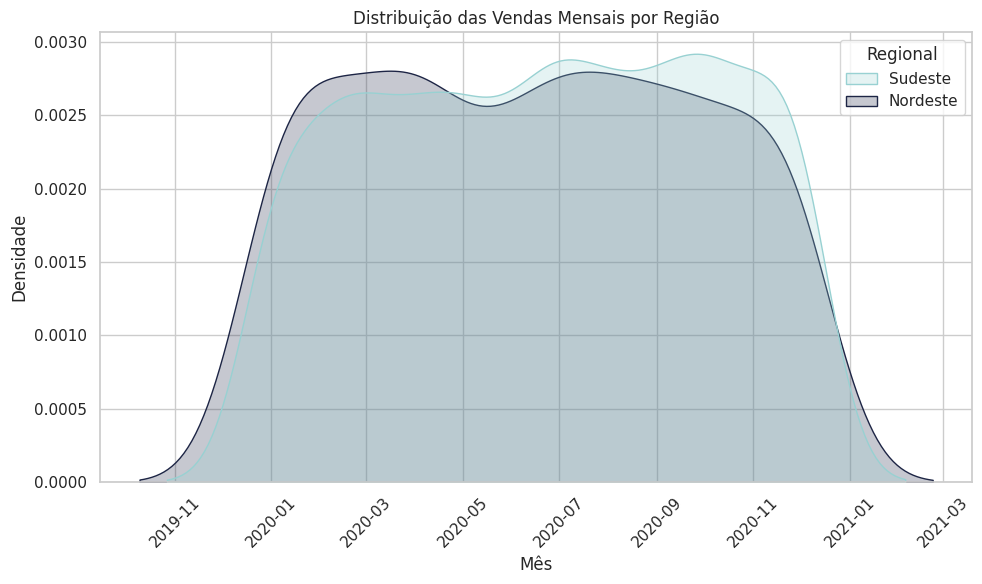

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='mes', hue='Regional', fill=True, common_norm=False, palette="ch:rot=-.25,hue=1,light=.75")
plt.title('Distribuição das Vendas Mensais por Região')
plt.xlabel('Mês')
plt.ylabel('Densidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: qual o nome do grafico acima

KDE plot


##**4 - Relação entre Quantidade Vendida e o Valor Total da Venda**

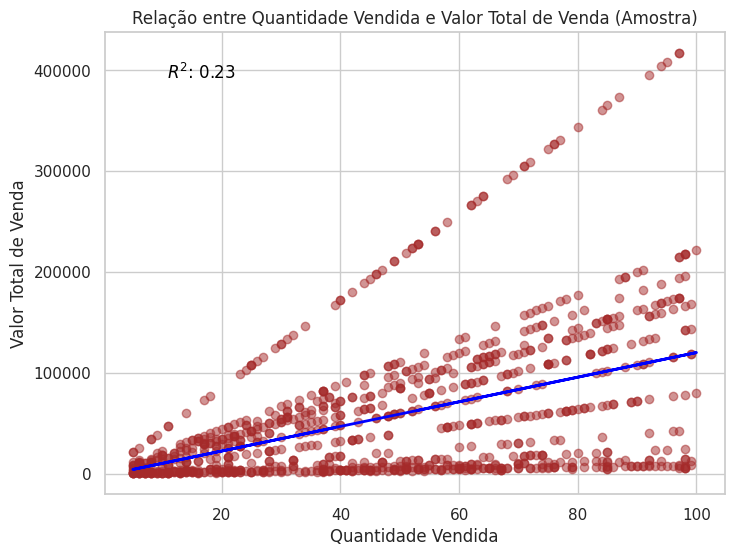

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Amostragem dos dados
df_sample = df.sample(frac=0.3, random_state=42)  # Seleciona 30% dos dados

x = df_sample['Quantidade_Vendida'].values.reshape(-1, 1)
y = df_sample['Valor_Total_Venda'].values

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

r2 = r2_score(y, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='brown', alpha=0.5)
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.text(0.1, 0.9, f'$R^2$: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.title('Relação entre Quantidade Vendida e Valor Total de Venda (Amostra)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Valor Total de Venda')
plt.grid(True)
plt.show()


## **Média**

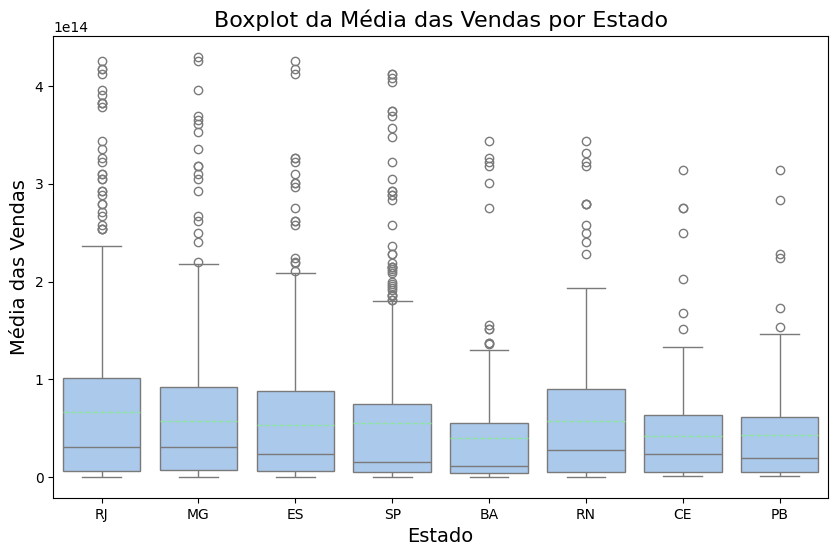

In [ ]:
df['Valor_Total_Venda'] = df['Valor_Total_Venda'].astype(str)
df['Valor_Total_Venda'] = df['Valor_Total_Venda'].str.replace('R$', '', regex=False).str.replace('.', '').str.replace(',', '.').astype(float)

# Calcular a média das vendas por estado
media_vendas_por_estado = df.groupby('Estado_Cliente')['Valor_Total_Venda'].mean()

# Criar o boxplot da média das vendas por estado
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estado_Cliente', y='Valor_Total_Venda', data=df, showmeans=True, meanline=True)

# Adicionar título e rótulos aos eixos
plt.title('Boxplot da Média das Vendas por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média das Vendas', fontsize=14)

# Mostrar o gráfico
plt.show()


os dados são positivamente assimétricos